In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, 
import seaborn as sns # data visualization
import matplotlib.pyplot as plt # data visualization

In [2]:
df=pd.read_csv("C:/HOCDATA/Last_project/adult.csv")

In [3]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [6]:
df['workclass'] = df['workclass'].replace('?', np.nan)
df['occupation'] = df['occupation'].replace('?', np.nan)
df['native-country'] = df['native-country'].replace('?', np.nan)

In [7]:
df.isin(['?']).sum()


age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [9]:
df.dropna(how='any', inplace=True)

In [10]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [11]:
df.duplicated().sum()

47

In [12]:
df = df.drop_duplicates()

In [13]:
df.duplicated().sum()

0

In [21]:
df.describe()


,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_over_50K
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512,0.247969
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730,0.431839
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


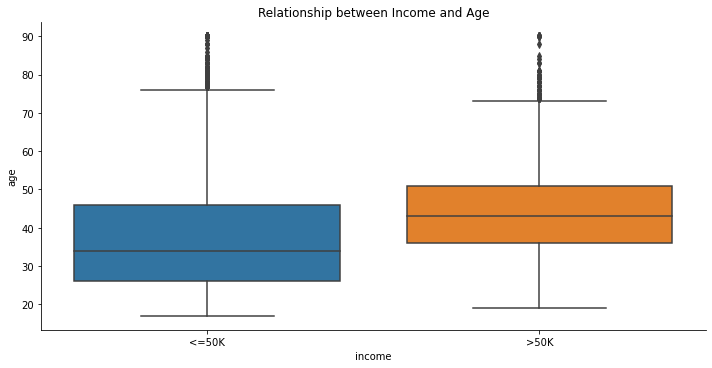

In [15]:
sns.catplot(data=df, x='income', y='age', kind= 'box', aspect=2)
plt.title('Relationship between Income and Age')
plt.show()
# Most of the people having income less than or equal to 50K are between age 25-45 and most of the people having income over 50K are between age 37-50

In [16]:
def good_income(income):
    if income == '<=50K':
        return 0
    else:
        return 1

In [17]:
df['income_over_50K']= df['income'].apply(good_income)


In [18]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,income_over_50K
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K,0


In [19]:
df.groupby('gender')['income_over_50K'].mean().sort_values(ascending=False)
#More men has higher income over 50K than women

gender
Male      0.312609
Female    0.113692
Name: income_over_50K, dtype: float64

In [22]:
df.groupby('race')['income_over_50K'].mean().sort_values(ascending=False)
#It's look like Asian-Pac-Islander and White has the highest income compare to others races

race
Asian-Pac-Islander    0.283628
White                 0.262513
Other                 0.127479
Black                 0.126331
Amer-Indian-Eskimo    0.121839
Name: income_over_50K, dtype: float64

In [27]:
df['race'].value_counts(normalize=True) * 100
#it's look like Black , Asian-Pac-Islander, Amer-Indian-Eskimo make less than 14% of the total data collected. 

White                 86.018816
Black                  9.356945
Asian-Pac-Islander     2.879911
Amer-Indian-Eskimo     0.962922
Other                  0.781406
Name: race, dtype: float64

In [20]:
df.groupby('workclass')['income_over_50K'].mean().sort_values(ascending= False)
#self_employ has the highest income

workclass
Self-emp-inc        0.554407
Federal-gov         0.390469
Local-gov           0.295161
Self-emp-not-inc    0.279051
State-gov           0.267215
Private             0.217816
Without-pay         0.095238
Name: income_over_50K, dtype: float64